# Sequence-to-Seqeunce

* https://wikidocs.net/24996

* Sequence-to-sequence(Seq2Seq)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 모델
* 예를 들어, 한국어 도메인을 가지는 문장을 입력해 중국어 도메인에 해당하는 문장을 얻을 수 있음
* Seq2Seq는 다른 특별한 기술을 이용하는 것이 아닌 지금까지 배운 RNN 기술들을 조합해 만들며, encoder와 decoder로 구성

# 기계 번역 데이터

* 일반적인 자연어 처리의 경우, 입력 시퀀스와 출력 시퀀스의 길이가 동일함
* Seq2Seq는 입력 시퀀스와 출력 시퀀스의 길이가 다를 수 있다고 가정
* Seq2Seq에는 인코더의 입력, 디코더의 입력, 디코더의 출력에 해당하는 데이터가 필요



* 데이터는 영어 문장과 그에 해당하는 프랑스어 문장이 존재하는 기계 번역 데이터를 사용
* url 주소에서 데이터를 받아오고, 필요없는 열(lic)은 제거



* http://www.manythings.org/anki/fra-eng.zip

*   데이터를 모두 사용할 경우 많은 시간이 소요되기 때문에, 일부 데이터만 사용
*   목표 데이터에는 시작과 끝을 나타내는 토큰이 포함되어야 함
*   여기서는 '\t'와 '\n'을 각각 시작과 끝을 나타내는 토큰으로 사용



*   해당 예제에서는 글자 단위로 예측, 따라서 글자 집합을 구축해주어야 함
*   구축한 다음, 정렬해 인덱스를 부여해 글자에 해당하는 사전을 만듬
*   사전은 글자를 모델에 투입하도록 변환하거나 예측시 반환되는 인덱스들을 글자로 변환할 때 사용



*   인코더에 입력될 입력 데이터를 구성
*   문장의 글자 하나씩을 사전을 이용해 인덱스로 변환해 리스트에 넣음





*   디코더에 입력될 입력 데이터를 구성
*   인코더 입력 데이터 처리와 동일하나, 목표 데이터에 해당하는 사전을 사용해주어야 함




*   디코더의 출력과 비교할 목표 데이터를 구성
*   디코더의 입력 데이터를 구성할 때와 동일하나, 시작 토큰을 제외해주어야 함





* 각각의 데이터를 동일한 길이로 맞춰줌
* 길이를 맞춰줄 때는 해당 데이터의 최대 길이로 맞춰줌
* 원 핫 인코딩을 통해 원 핫 벡터로 변환



## 인코더(Encoder)

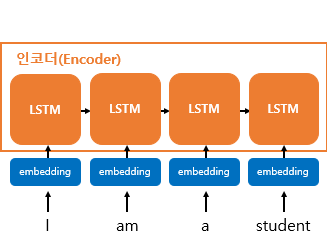



* encoder는 입력 문장을 받는 여러 개의 RNN cell
* 입력은 단어 토큰화로 단어 단위로 쪼개지고, 이는 각 시점의 encoder 입력이 됌
* encoder는 모든 단어를 입력받고 마지막 시점의 은닉 상태를 decoder RNN cell의 첫번째 은닉 상태로 넘겨주며,
이를 컨텍스트 벡터(context vector)라고 함
* encoder는 입력 시퀀스를 컨텍스트 벡터라는 고정 길이 벡터로 압축하고자 함



## 인코더 모델 구성



*   encoder의 구성은 일반 lstm 모델과 동일
*   lstm 안의 return_state는 은닉 상태를 반환해줘 seq2seq 모델을 구성할 때 필요함



## 디코더(Decoder)

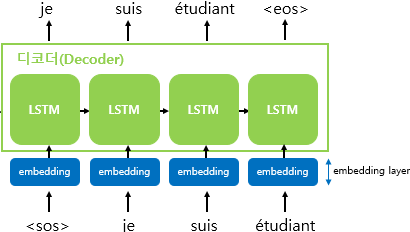

* decoder는 encoder와 마찬가지로 여러 개의 RNN cell로 이루어짐
* decoder의 처음 입력은 시작을 나타내는 토큰을 입력하며, 이 토큰 다음에 등장할 단어를 예측
* 처음 셀에서 단어를 예측한 결과는 다시 다음 시점의 decoder 입력으로 사용
* 위 과정을 반복해, 끝을 나타내는 토큰이 예측될 때까지 반복
* 요약하자면 decoder는 encoder에서 넘겨받은 컨텍스트 벡터를 활용해 시퀀스를 만들어 냄



### 교사 강요(Teacher Forcing)


* 앞서 설명한 seq2seq 모델을 잘 살펴보면 디코더의 입력이 필요하지 않음을 알 수 있음
* 예측이 잘못됐을 경우, 잘못된 예측이 다음 시점으로 입력돼 연쇄적으로 잘못된 예측을 함
* 이를 해결하기 위해 디코더의 다음 시점의 입력으로 이전 시점의 출력이 아닌, 정답을 주어 이를 방지함





## 디코더 모델 구성



*   모델의 구성은 encoder과 거의 유사함
*   lstm의 return_sequences는 출력을 시퀀스로 반환할 때 사용
*   decoder_lstm을 사용할 때는 initial_state를 인코더의 은닉 상태로 설정
*   마지막으로 Dense layer와 softmax를 통과해 예측 글자에 해당하는 인덱스를 반환



## Seq2Seq 모델



*   앞서 구성한 encoder와 decoder를 결합해 seq2seq model을 구성
*   구성한 모델과 준비한 데이터를 사용해 기계 번역 학습



## 예측



*   일반 모델과는 다르게, seq2seq 모델은 모델 예측 프로세스가 다름
*   예측할 때는 인덱스 하나씩을 예측하게 되며, 예측한 인덱스를 저장하고 이를 다시 입력으로 사용해 종료 토큰이 나올때까지 반복
*   마지막으로 예측한 인덱스들을 사전을 통해 글자들로 변환해 최종 예측을 얻음



# Attention Mechanism

* https://wikidocs.net/22893
* https://wikidocs.net/48920


* seq2seq 모델의 문제점
  + 하나의 고정 길이 벡터에 모든 정보를 압축해 정보 손실 발생
  + RNN의 문제점인 기울기 소실 문제가 똑같이 발생
* seq2seq 문제 개선을 위해 Attention Mechanism이 탄생



* Attention Mechanism은 디코더가 예측하는 시점마다 인코더의 전체 입력 문장을 다시 한번 참조
* 이때 전체 입력 문장을 단순히 참조하지 않고, **예측할 단어와 연관이 있는 단어를 집중(Attention)**해서 참조

## Attention Mechanism 종류

* attention mechanism에는 스코어 계산 방식의 차이에 따라 다양한 종류가 존재



이 름                 | 스 코 어&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                 
----------------------|-----------------------
dot|$score(s_t, h_i) = s_t^Th_i$
scaled dot|$score(s_t, h_i) = \frac{s_t^Th_i}{\sqrt n}$
general|$score(s_t, h_i) = s_t^TW_ah_i$
concat|$score(s_t, h_i) = W_a^Ttanh(W_b[s_t;h_i])$
location-base|$a_t = softmax(W_as_t)$

  + $s_t$ : querys(t 시점에서의 디코더 셀의 은닉 상태)
  + $h_i$ : keys(모든 시점의 인코더 셀 은닉 상태)
  + $W_a, W_b$ : 학습 가능한 가중치 행렬



## Attention Mechanism 과정

* Attention Mechanism 중 가장 기초적인 dot-product attention을 예제로 적용 과정을 학습
* Attention Mechanism 과정
  1. attention score 계산
  2. 소프트맥스 함수를 통한 attention distribution 계산
  3. 각 인코더의 어텐션 가중치와 은닉 상태를 가중합하여 어텐션 값 계산
  4. 어텐션 값과 디코더의 t 시점의 은닉 상태를 연결
  5. 출력층 연산의 입력이 되는 $\tilde{s}_t$ 계산



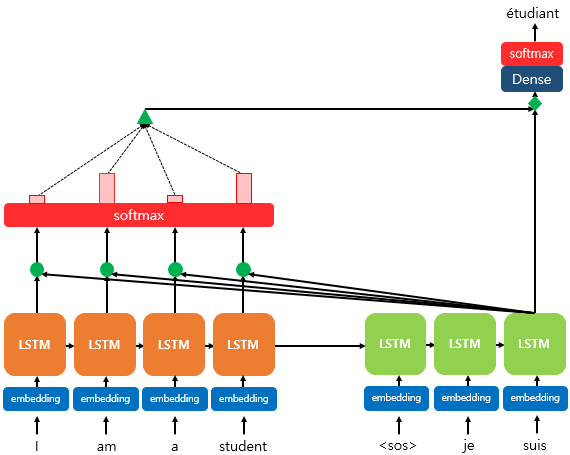

### Attention score 계산

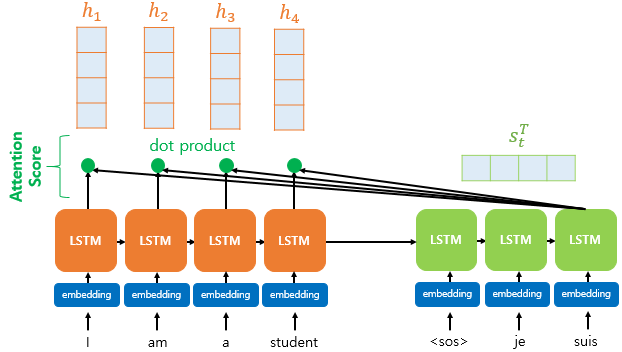



*   t 시점 디코더의 은닉 상태를 $s_t$로 지정
*   인코더의 각 시점의 은닉 상태는 $h_n$으로 지정
*   여기서는 dot-product attention이므로 $s_t$와 $h_n$들을 각각 내적해 각각의 attention score를 계산
*   이를 정리하면 attention scores = $e^t = [s_t^Th_1, s_t^Th_2, ... , s_t^Th_n$]



### 소프트 맥스 함수를 통한 attention distribution 계산

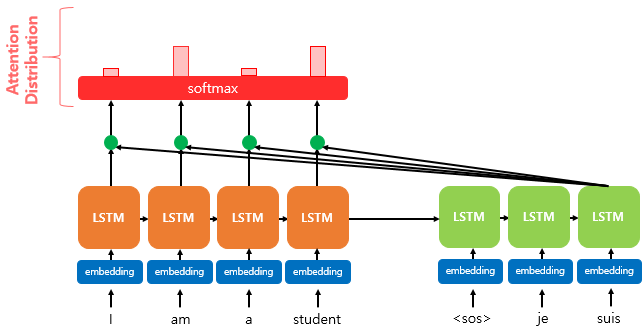



*   $e^t = [s_t^Th_1, s_t^Th_2, ... , s_t^Th_n$]에 softmax를 적용해 각각의 확률값을 계산
*   내적이 크다면 확률값이 높아질 것이고, 작다면 확률값이 낮아짐
*   결국 확률값을 구하는 것은 예측할 단어와 연관이 있는 단어를 찾는 것
*   시점 t의 어텐션 분포를 $a^t$이라고 하면, 다음과 같은 식이 성립함
$$ a^t = softmax(e^t) $$



### 각 인코더의 어텐션 가중치와 은닉 상태를 가중합해 어텐션 값 계산

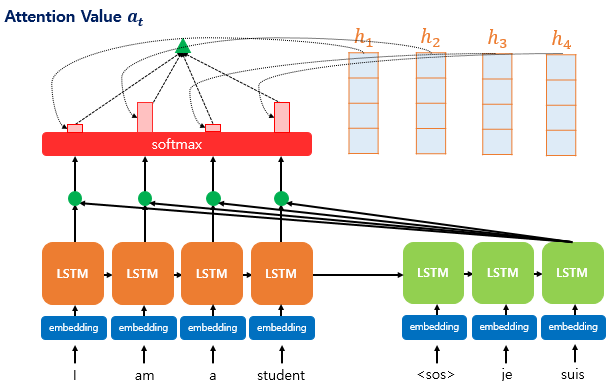



*   각 인코더의 은닉 상태와 어텐션 가중치들을 곱하고 어텐션 값을 계산
*   어텐션 값에 대한 수식은 $a_t = \sum^N_{i=1}{a^t_ih_i}$



### 어텐션 값과 디코더의 t 시점의 은닉 상태를 연결

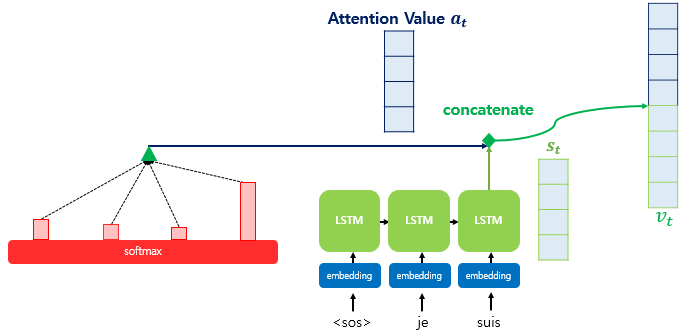



*   어텐션 값 $a_t$를 구했다면 $s_t$와 연결해 예측 연산에 사용할 $v_t$를 계산함
*   $v_t$는 기존과는 다르게 인코더의 정보를 가지고 있어 좀 더 좋은 성능의 예측을 수행할 수 있음



## Attention Mechanism 모델

### 인코더(Encoder))



*   인코더는 seq2seq에서 작성한 것과 동일



### 디코더(Decoder)



*   디코더에서는 seq2seq와는 다르게 attention layer를 추가함
*   S_는 은닉 상태와 디코더의 최종 출력을 연결한 결과, 연결할 때 형상을 맞춰주기 위해 축을 추가함
*   attention layer는 디코더의 은닉 상태와 인코더 은닉 상태 전체를 받아 컨텍스트 벡터를 생성함
*   이 때 attention layer는 앞서 설명한 과정 중 1~3번째를 수행, 나머지는 사용자가 연결해주어야 함
*   마지막으로 생성한 컨텍스트 벡터와 디코더의 은닉 상태 전체를 이어 softmax layer에 투입, 인덱스를 예측함



### 모델 구성 및 학습



*   구성하는 방법은 seq2seq와 동일함
*   attention mechanism을 활용해 학습 시간이 절반 가량 준 것을 확인할 수 있음



### 예측




*   예측도 seq2seq와 동일하나, 추가된 모델 구조를 반영해주어야 함(attention layer)
*   encoder와 decoder를 분리해주었기 때문에 디코더에서 인코더의 은닉 상태(estate_h)와 최종 은닉 상태(encoder_outputs)를 따로 입력받아야 함
*   나머지는 seq2seq에서 작성한 부분과 동일함









*   seq2seq와 동일한 문장을 번역
*   seq2seq에 비해 좀 더 나은 성능을 보여줌

